# 1. Business Understanding - Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

- The data we are using is from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn. 
- In our dataset we have 7,043 customers and 21 variables that capture demographics and customer relationship history. Here we are studying customer churn behavior in telecommunication. 
- Customer churn has many definitions: customer attrition, customer turnover, or customer defection. The all refer to loss of customers which can be by choice (voluntary) or relocation (involuntary).  Our goal is to predict customers being at risk to churn. This would help the company to design activities to retain the customer to the firm and prevent churn. Our results would help the company in developing strategies to retain their customers, their main asset, which is a key aspect for their success.


In [1]:
# Import basic packages lik numpy, pandas, math plot and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
import pandas_profiling as pr
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import the data using pd.read_csv() from Kaggle https://www.kaggle.com/blastchar/telco-customer-churn
df = pd.read_csv('https://raw.githubusercontent.com/lijjumathew/MSDS-Machine-Learning-1-Project/master/dataset/Telco-Customer-Churn.csv')
df.sample(5).T

,4853,5584,3021,4414,3997
customerID,0440-UEDAI,6330-JKLPC,6377-KSLXC,5372-FBKBN,6023-GSSXW
gender,Female,Male,Male,Female,Female
SeniorCitizen,0,0,0,0,0
Partner,No,Yes,No,No,Yes
Dependents,No,No,No,Yes,No
tenure,53,11,5,21,69
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,No,Yes,No,No,No
InternetService,Fiber optic,Fiber optic,No,No,DSL
OnlineSecurity,No,No,No internet service,No internet service,No


# 2. Data Meaning Type - Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
 
Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.
 
- customerID : Customer ID                           
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No) 


In [3]:
pr.ProfileReport(df)

# Data Quality - Verify data quality: Explain any missing values, duplicate data, and outliers.  Are those mistakes? How do you deal with these problems  Be specific.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###### df.info() showed that the column “Total Charges” has the type object but should be a number. For that reason, we are changing it into numeric using the pandas function pd.to_numeric()

In [5]:
# Replacing blank values with nulls.
df=df.replace(r'^\s*$', np.nan, regex=True)
# Total charges has some blank values/missing values and needs to be imputed. Filling the missing values
print(df.isnull().sum())
df_imputed = df.fillna(df.mean())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [6]:
# converting TotalCharges object dataset into numeric
# errors = 'coerce’ means, if invalid parsing occur then set NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

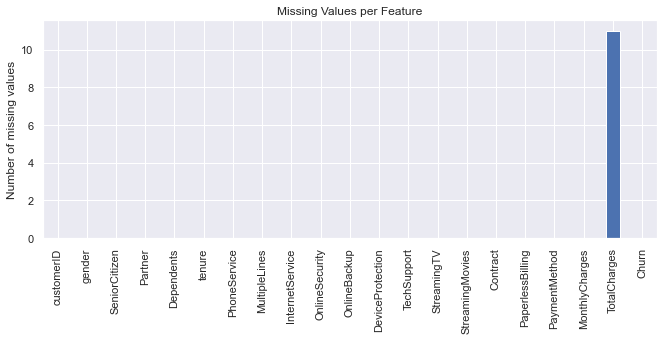

In [7]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature');


In [8]:
# Converting the data types

categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                       'StreamingTV',  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
continuous_features = ['tenure','MonthlyCharges','TotalCharges']
df[continuous_features] = df[continuous_features].astype(np.float64)
df[categorical_features] = df[categorical_features].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Tenure in months as year range
df_imputed['tenure_range'] = pd.cut(df_imputed.tenure,[0,12,24,36,48,60,72,84],3,labels=['1 year','2 year','3 year', ' 4 year', '5 year', '6 year', '7 year'])

In [10]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

###### Number of churn

In [11]:
is_churn = df['Churn']=='Yes' #creating a filter where churn ='yes'
y_true = df.Churn[is_churn]

print ("We are interested in the YES class, but has less data = "+str( (y_true.shape[0] / df["Churn"].shape[0]) * 100 ))

We are interested in the YES class, but has less data = 26.536987079369588


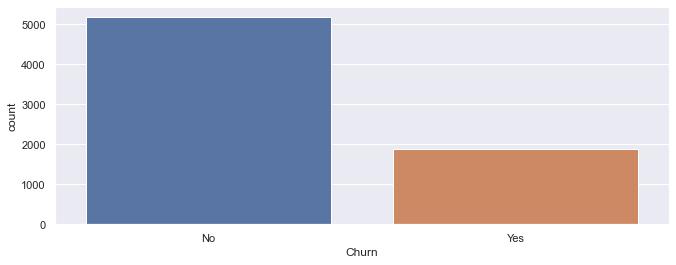

In [12]:
sns.countplot(df["Churn"]);

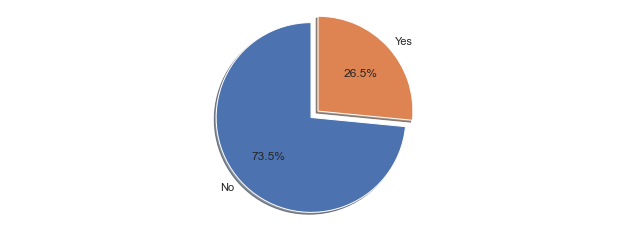

In [13]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis('equal') ;

# Simple Statistics - Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

In [14]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


From the above summary statistics we can see that
- Half of the clients remain in the company for more than 29 months (just over two years)
- The average amount per month  65 
- The average total revenue generated per customer is  2284

#### Data Transformation

In [15]:
# Getting rid of unwanted columns like Customer Id.
if 'customerID' in df:
    del df['customerID']

In [16]:
#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns

df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')

<AxesSubplot:xlabel='tenure_range'>

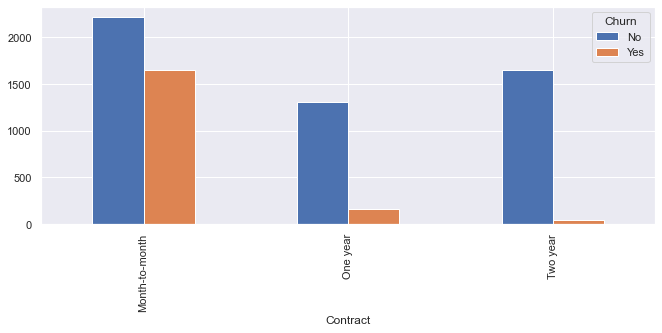

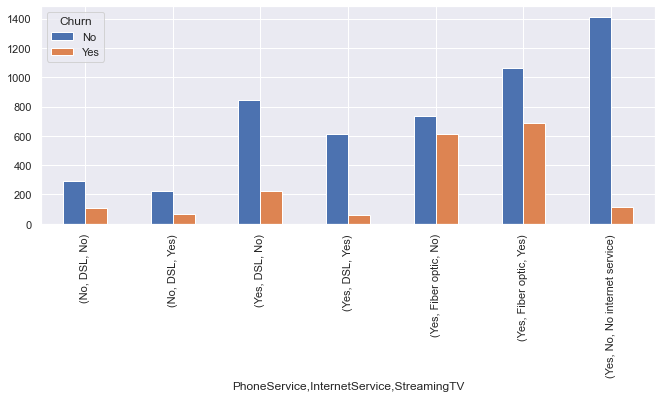

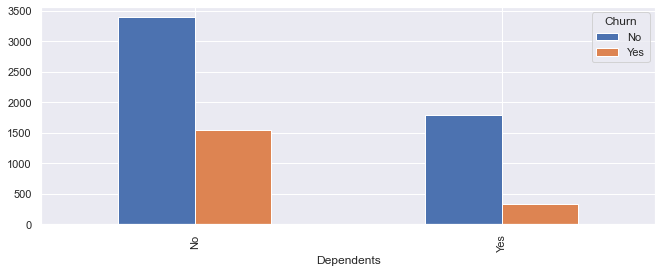

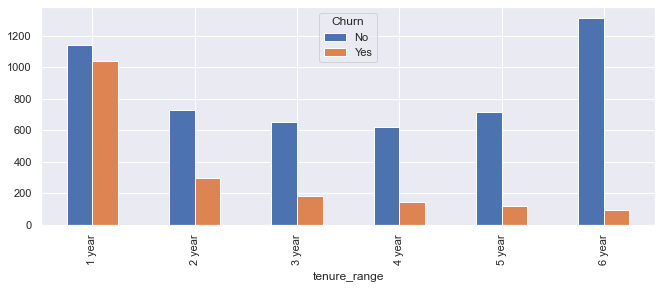

In [17]:
# Churn Analysis
churn_contract = pd.crosstab([df_imputed['Contract']], df_imputed.Churn)
churn_contract.plot(kind='bar')

churn_service = pd.crosstab([df_imputed['PhoneService'],df_imputed['InternetService'],df_imputed['StreamingTV']], df_imputed.Churn)
churn_service.plot(kind='bar')

churn_contract = pd.crosstab([df_imputed['Dependents']], df_imputed.Churn)
churn_contract.plot(kind='bar')

churn_tenure = pd.crosstab([df_imputed['tenure_range']], df_imputed.Churn)
churn_tenure.plot(kind='bar')

<AxesSubplot:xlabel='PhoneService'>

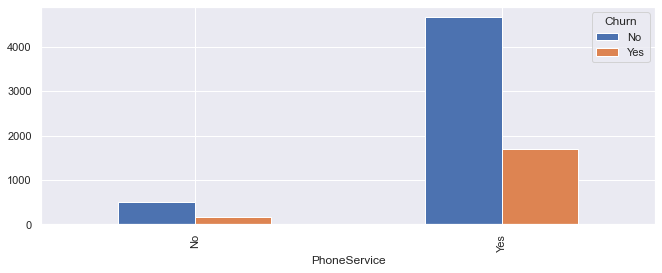

In [18]:
churn_contract = pd.crosstab([df_imputed['PhoneService']], df_imputed.Churn)
churn_contract.plot(kind='bar')

<AxesSubplot:xlabel='InternetService'>

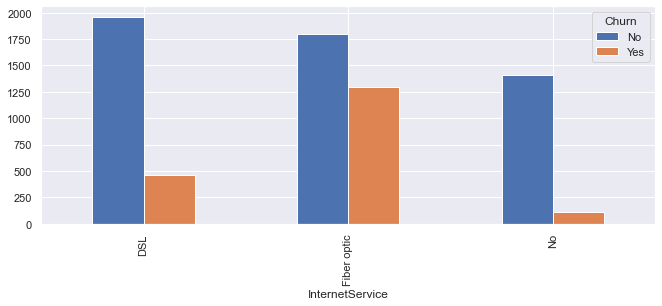

In [19]:
churn_contract = pd.crosstab([df_imputed['InternetService']], df_imputed.Churn)
churn_contract.plot(kind='bar')

In [20]:
df_cat = df.select_dtypes(exclude=["number","bool_","float_"])
df_cat.sample(5).T

,745,5614,6779,1211,4629
gender,Female,Male,Male,Female,Female
SeniorCitizen,No,No,No,No,No
Partner,Yes,Yes,No,Yes,No
Dependents,No,Yes,Yes,Yes,No
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,Fiber optic,Fiber optic,DSL,DSL,No
OnlineSecurity,No,Yes,Yes,No,No internet service
OnlineBackup,Yes,Yes,Yes,No,No internet service
DeviceProtection,Yes,No,Yes,No,No internet service


In [21]:
df_num = df.select_dtypes(exclude=["bool_", "object_"])
df_num.sample(5).T

,3008,6270,212,1538,5850
tenure,11.00,29.0,61.00,8.00,20.0
MonthlyCharges,20.00,20.2,19.75,100.85,71.3
TotalCharges,211.95,558.8,1124.20,819.55,1389.2


In [22]:
#create data audit report for numerical variables
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.var(),x.std(),x.mean(),x.median(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),
              x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),
              x.dropna().quantile(0.95),x.dropna().quantile(0.99)],index=['N','NMISS','SUM','VAR','STD','MEAN','MEDIAN','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99'])
num_summary = df_num.apply(lambda x : var_summary(x)).T
num_summary

,N,NMISS,SUM,VAR,STD,MEAN,MEDIAN,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99
tenure,7043.0,0.0,2.279900e+05,6.031681e+02,24.559481,32.371149,29.00,0.00,1.0,1.00,2.00,9.000,29.00,55.00,69.00,72.000,72.000
MonthlyCharges,7043.0,0.0,4.561166e+05,9.054109e+02,30.090047,64.761692,70.35,18.25,19.2,19.65,20.05,35.500,70.35,89.85,102.60,107.400,114.729
TotalCharges,7043.0,0.0,1.608129e+07,5.130226e+06,2265.000258,2283.300441,1400.55,18.80,19.9,49.65,84.61,402.225,1400.55,3786.60,5973.69,6921.025,8039.256


# Visualize Attributes - Visualize the most important attributes appropriately (at least 5 attributes).  Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

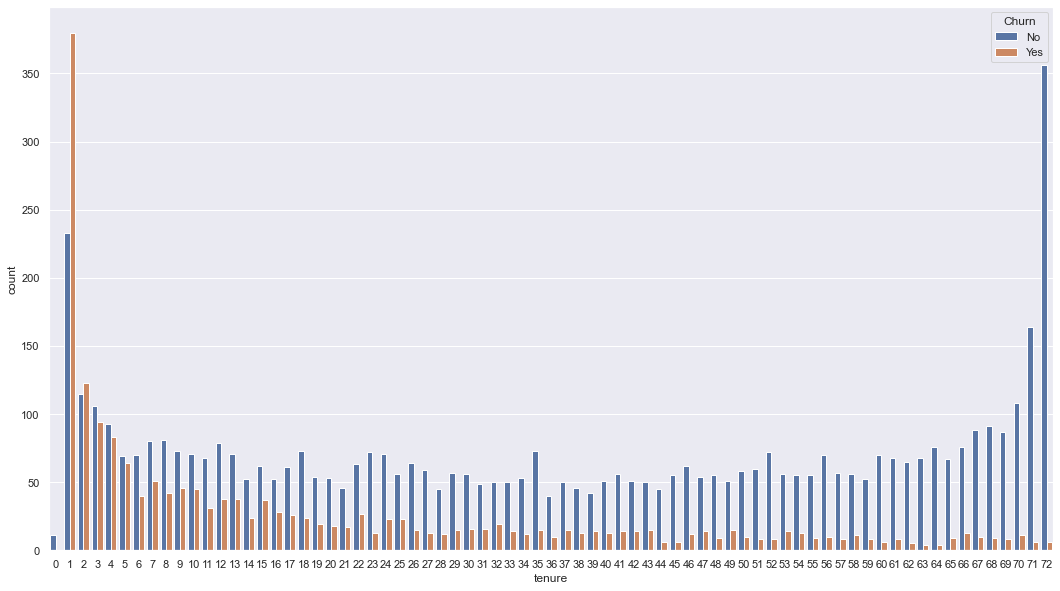

In [23]:
f, axes = plt.subplots(figsize=(18, 10))
sns.countplot(df_imputed["tenure"],hue = df_imputed["Churn"]);

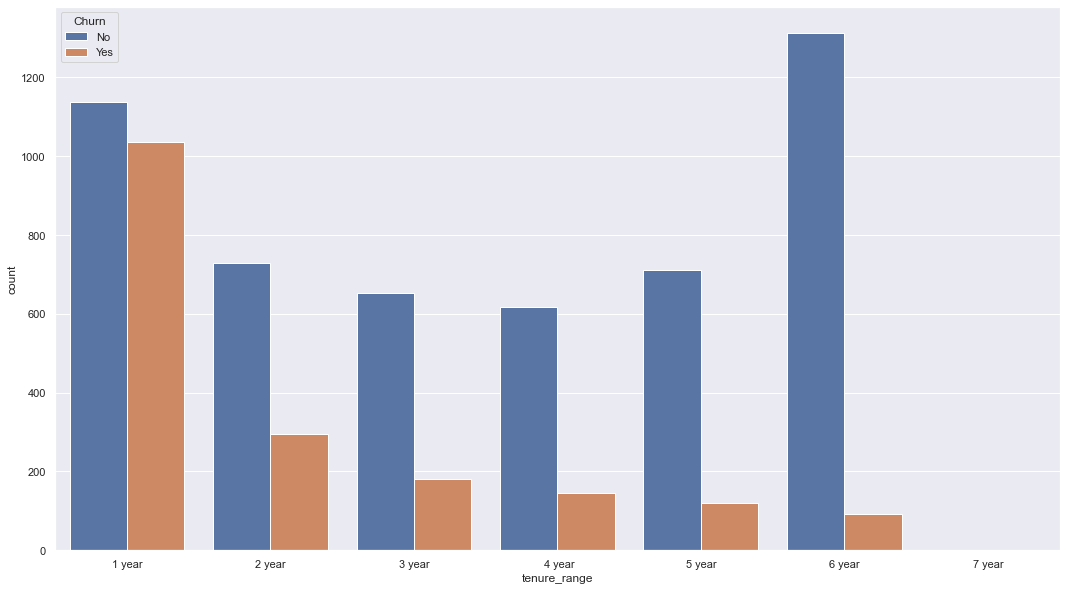

In [24]:
f, axes = plt.subplots(figsize=(18, 10))
sns.countplot(df_imputed["tenure_range"],hue = df_imputed["Churn"]);

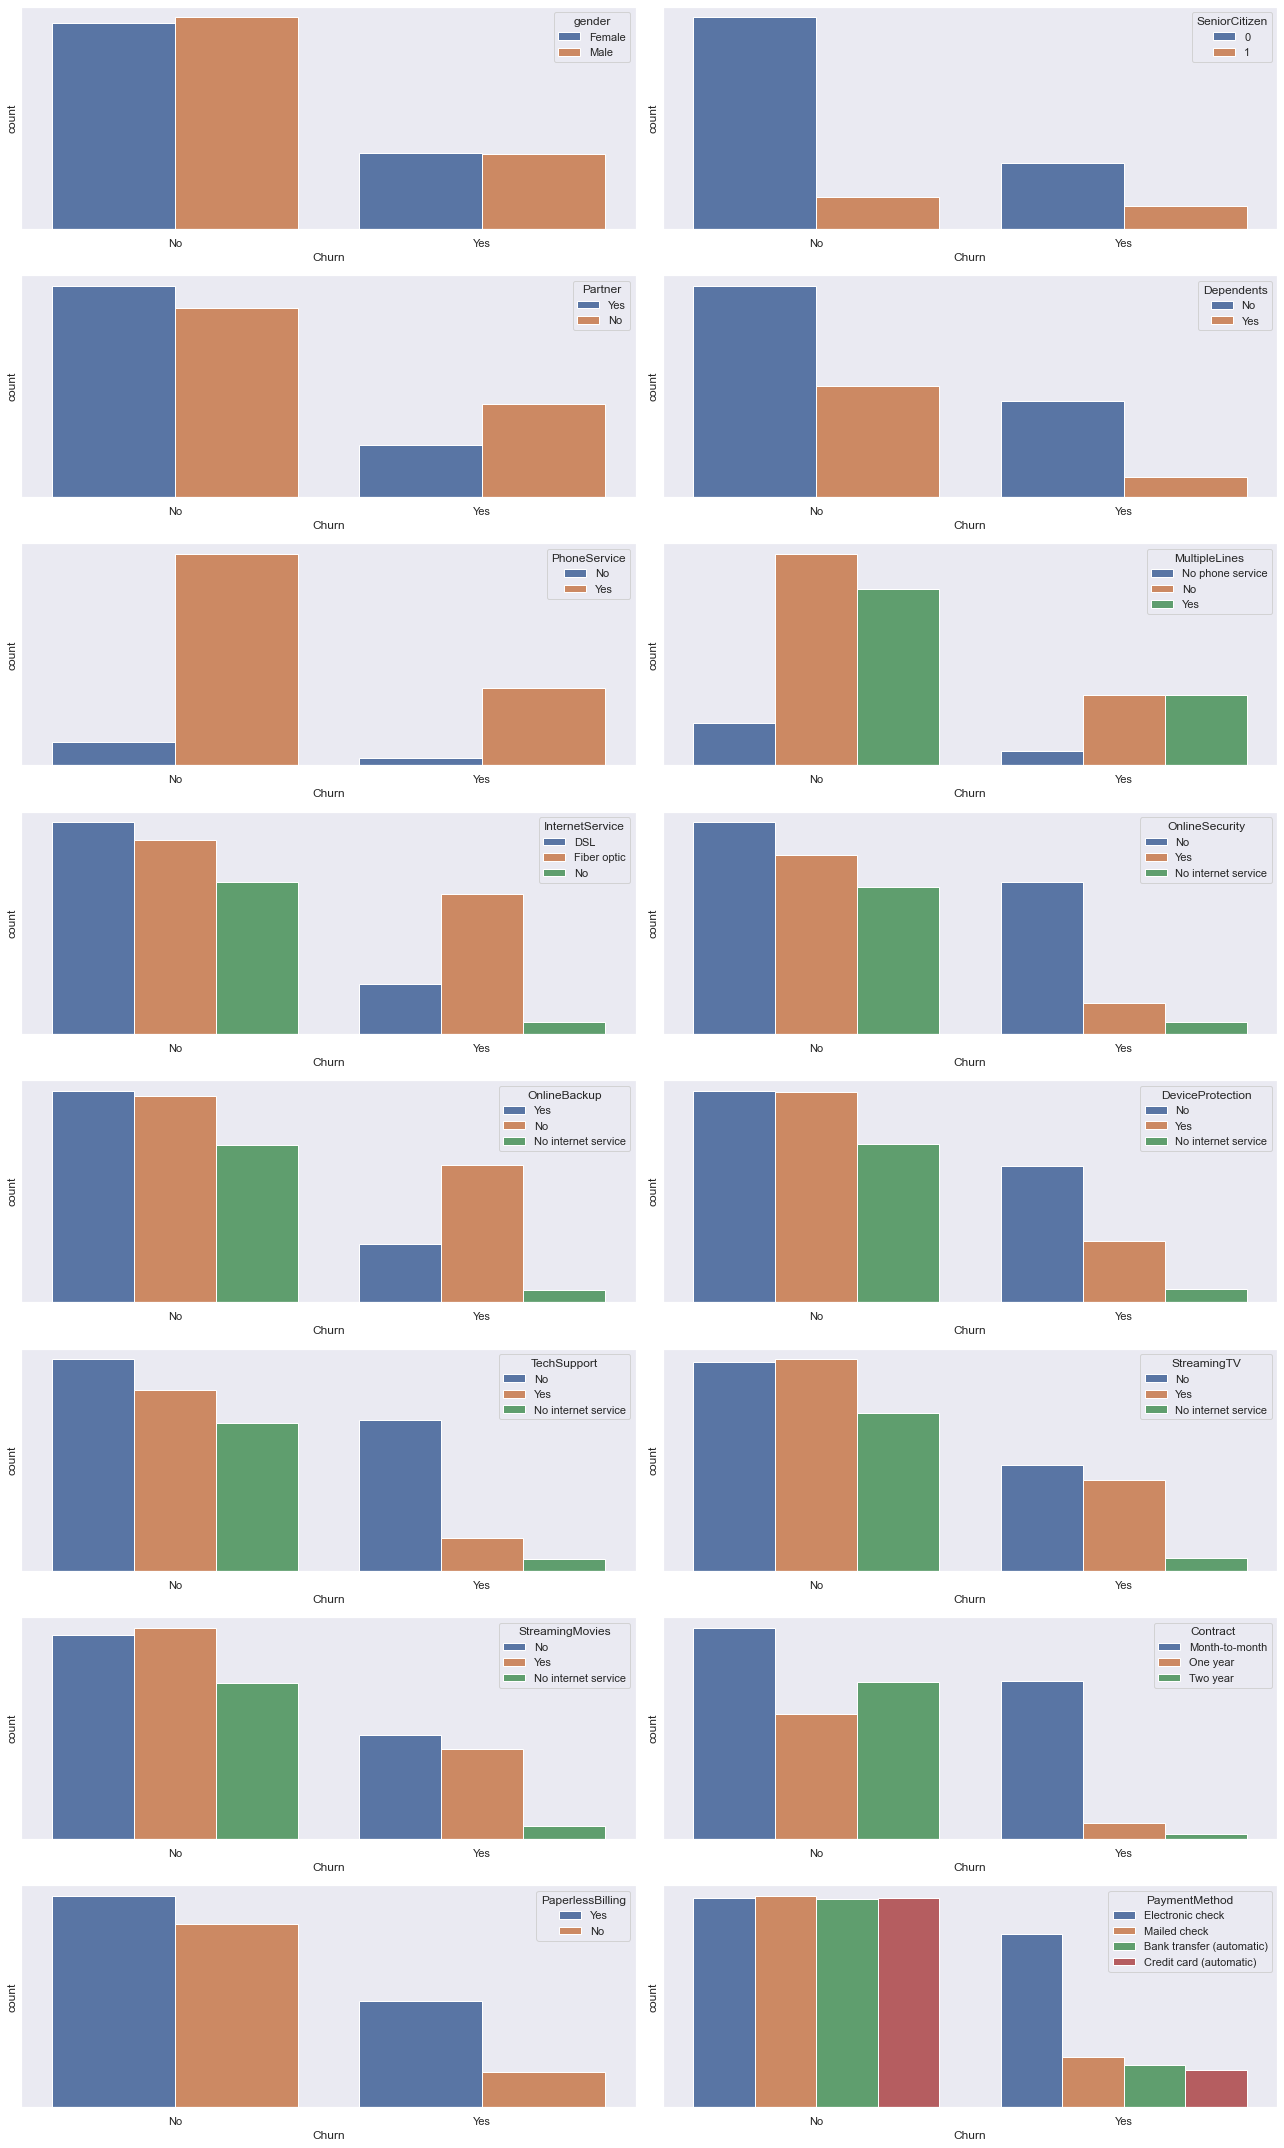

In [25]:
f, axes = plt.subplots(nrows=8, ncols=2, figsize=(18,30))

sns.countplot(df_imputed["Churn"],hue = df_imputed["gender"],ax = axes[0,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["SeniorCitizen"],ax = axes[0,1])
sns.countplot(df_imputed["Churn"],hue = df_imputed["Partner"],ax = axes[1,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["Dependents"],ax = axes[1,1])
sns.countplot(df_imputed["Churn"],hue = df_imputed["PhoneService"],ax = axes[2,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["MultipleLines"],ax = axes[2,1])
sns.countplot(df_imputed["Churn"],hue = df_imputed["InternetService"],ax = axes[3,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["OnlineSecurity"],ax = axes[3,1])
sns.countplot(df_imputed["Churn"],hue = df_imputed["OnlineBackup"],ax = axes[4,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["DeviceProtection"],ax = axes[4,1])
sns.countplot(df_imputed["Churn"],hue = df_imputed["TechSupport"],ax = axes[5,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["StreamingTV"],ax = axes[5,1])
sns.countplot(df_imputed["Churn"],hue = df_imputed["StreamingMovies"],ax = axes[6,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["Contract"],ax = axes[6,1])
sns.countplot(df_imputed["Churn"],hue = df_imputed["PaperlessBilling"],ax = axes[7,0])
sns.countplot(df_imputed["Churn"],hue = df_imputed["PaymentMethod"],ax = axes[7,1])

plt.setp(axes, yticks=[])
plt.tight_layout()

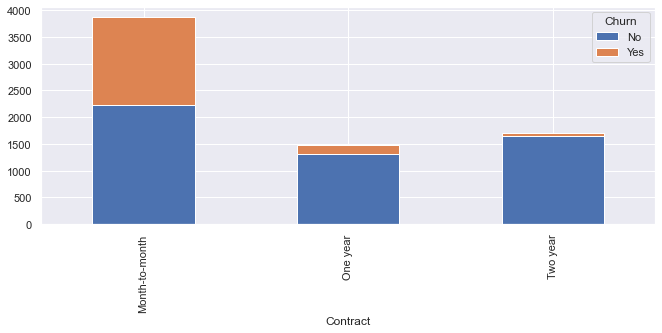

In [26]:
df.groupby(['Contract','Churn']).size().unstack().plot(kind='bar',stacked=True); 
#Clearly, users with Month-to-Month contract are more likely to churn 

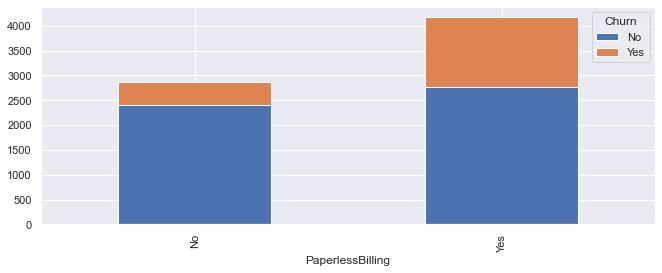

In [27]:
df.groupby(['PaperlessBilling','Churn']).size().unstack().plot(kind='bar',stacked=True);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

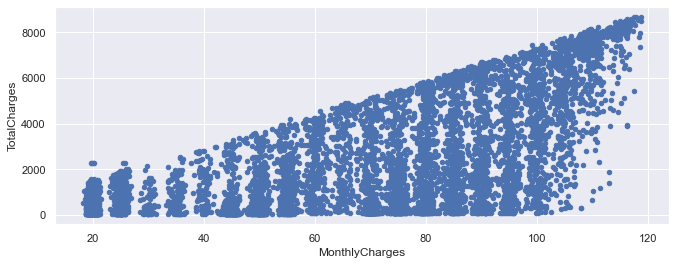

In [28]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges', y='TotalCharges')

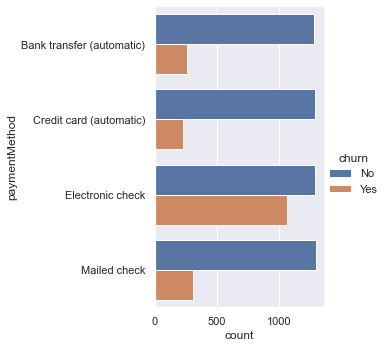

In [29]:
#payment method and churn
payment_method_count  = df_imputed[['PaymentMethod','Churn']].groupby(['PaymentMethod','Churn']).size().reset_index()
payment_method_count.columns = ['paymentMethod','churn','count']
sns.catplot(x = 'count',y='paymentMethod',hue='churn',data = payment_method_count,kind='bar')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

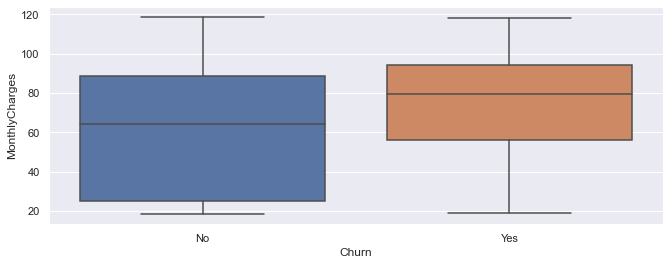

In [30]:
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = df_imputed)

In [42]:
def plot_distribution_num(df_num):
    sns.set_style('ticks')
    s = sns.FacetGrid(df,hue='Churn')
    s.map(sns.kdeplot,df_num,shade = True, alpha = 0.8)
    s.set(xlim=(0,df[df_num].max()))
    s.add_legend()
    s.set_axis_labels(df_num,'proportion')
    s.fig.suptitle(df_num)
    plt.show()

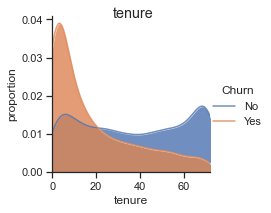

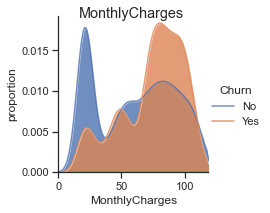

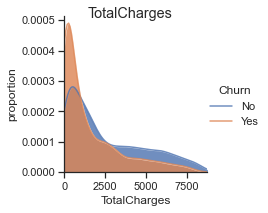

In [47]:
plot_distribution_num('tenure')
plot_distribution_num('MonthlyCharges')
plot_distribution_num('TotalCharges')

# Explore Joint Attributes - Explore relationships between attributes: Look at the attributes via scatterplots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.


<AxesSubplot:xlabel='SeniorCitizen', ylabel='MonthlyCharges'>

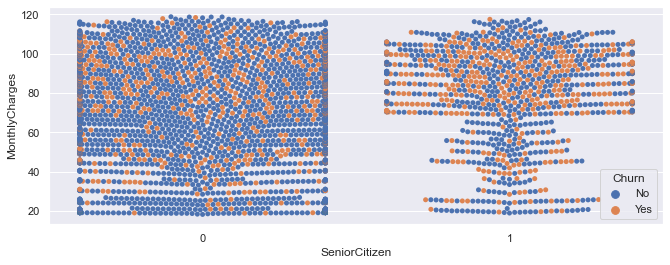

In [31]:
sns.swarmplot(x = 'SeniorCitizen', y = 'MonthlyCharges', hue="Churn", data = df_imputed)

In [32]:
import numpy as np
corr_abs = df_imputed.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol

tenure         MonthlyCharges    0.247900
SeniorCitizen  MonthlyCharges    0.220173
               tenure            0.016567
dtype: float64

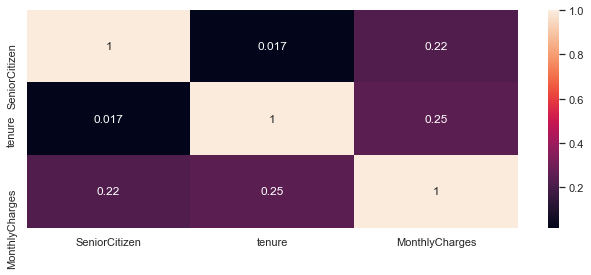

In [33]:
#Now, let's look at the numerical data. Creating correlation heatmap

sns.heatmap(df_imputed.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

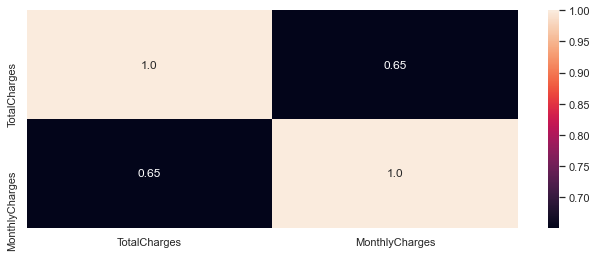

In [36]:
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr(),annot=True,fmt='.3');
#Since, monthly and Total Charges are corelated.. We'd need to remove one of them, let's remove TotalCharges

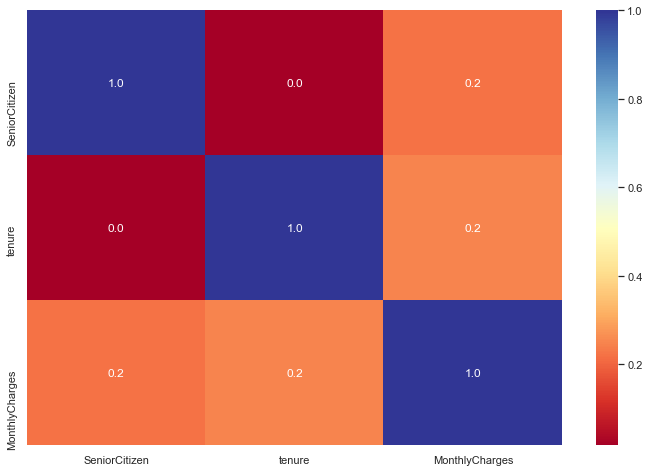

In [35]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_imputed.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

 # Question 1: Which customer has highest probability to switch to another telecom (known as Churn)
# Question 2: What could be the plausible reasons why churn is happening.
# Question 3: How good the prediction is? Can we rely on this predictive analytics.